In [1]:
import pandas as pd 
import numpy as np

In [74]:
245/(276+245)

0.47024952015355087

In [75]:
3/36

0.08333333333333333

In [76]:
1/18

0.05555555555555555

In [80]:
data = pd.read_csv('titanic.csv')


In [85]:
ct = pd.crosstab(data['Sex'], data['Survived'])
ct

Survived,0,1
Sex,,
female,81,233
male,468,109


# Mosaic Plot

My theory: I think mosaic plots are very useful for visualizing P(X|Y), which is useful for K-means, in this case if it is female it would predict 1

Actual: Wrong! K-means clustering doesn't use probabilities like that it is an unspervised learning algorithm , this is more aligned with logistic regression or decisin trees
Mosaic plots are useful for visualizing relationship between two categoricalv alues, contigency tables or prooortions but dont show the calculation of conditional probabilities
kmeans groups data points vbased on distance 

Mosaic plots can help etermine if data is dependent or independent, this is done by using chi-square test to determine association or dependency. Mosaic plots also show conditional distribution for example survived given female

If there is a relaionship we would expect the the cnditional distribution to differ

Chi squared test canbe used to determine whether a relationship exosts 

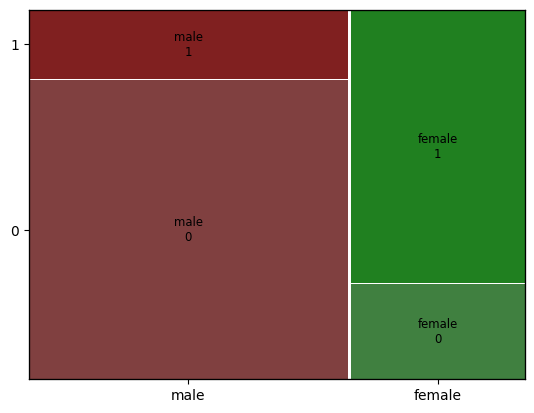

In [82]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
mosaic(data, ['Sex', 'Survived'])
plt.show()

In [30]:
print(f"The dataset has {data.shape[0]} instances and {data.shape[1]} attributes.")

The dataset has 891 instances and 12 attributes.


In [12]:
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:
missing_values = []
missing_col_names = []
for column in data.columns:
     
    is_null_count = data[column].isnull().sum()
    if is_null_count != 0:
        missing_values.append(data[column])
        missing_col_names.append(column)
        print(f"{column} has {is_null_count} null values.")

Age has 177 null values.
Cabin has 687 null values.
Embarked has 2 null values.


In [50]:
dic_data = {}
for sublist, col_name in zip(missing_values, missing_col_names):
    dic_data[col_name] = sublist
    
    

## Handling Missing Values

In [48]:
missing_values = pd.DataFrame(data=dic_data)
 

In [61]:

print(unique_missing_vals)
for col_name in missing_col_names:
    unique_missing_vals = missing_values[col_name].unique()
    for val in unique_missing_vals:
        val_counts = missing_values[missing_values[col_name] == val][col_name].count()
        print(f"{col_name}'s unique's value {val} has {val_counts} instances.")

['S' 'C' 'Q' nan]
Age's unique's value 22.0 has 27 instances.
Age's unique's value 38.0 has 11 instances.
Age's unique's value 26.0 has 18 instances.
Age's unique's value 35.0 has 18 instances.
Age's unique's value nan has 0 instances.
Age's unique's value 54.0 has 8 instances.
Age's unique's value 2.0 has 10 instances.
Age's unique's value 27.0 has 18 instances.
Age's unique's value 14.0 has 6 instances.
Age's unique's value 4.0 has 10 instances.
Age's unique's value 58.0 has 5 instances.
Age's unique's value 20.0 has 15 instances.
Age's unique's value 39.0 has 14 instances.
Age's unique's value 55.0 has 2 instances.
Age's unique's value 31.0 has 17 instances.
Age's unique's value 34.0 has 15 instances.
Age's unique's value 15.0 has 5 instances.
Age's unique's value 28.0 has 25 instances.
Age's unique's value 8.0 has 4 instances.
Age's unique's value 19.0 has 25 instances.
Age's unique's value 40.0 has 13 instances.
Age's unique's value 66.0 has 1 instances.
Age's unique's value 42.0 

In [72]:
print(f"S: {644/891}, C: {168/891}, Q: {77/891}")
print(f"S: {644/889}, C: {168/889}, Q: {77/889}")

print("s: ",(644/891 +168/891+77/891)-(644/889 +168/889+77/889))


S: 0.7227833894500562, C: 0.18855218855218855, Q: 0.08641975308641975
S: 0.7244094488188977, C: 0.1889763779527559, Q: 0.08661417322834646
s:  -0.002244668911335568


In [68]:
missing_values[missing_values['Embarked'].isna()]

,Age,Cabin,Embarked


In [69]:
missing_values[missing_values['Cabin'] == 'B28']

,Age,Cabin,Embarked
61,38.0,B28,NaN
829,62.0,B28,NaN
